# What's Word Embedding? 

* A word embedding is a learned representation for text where words that have the same meaning have a similar representation. 
* Word embeddings are a way to turn words into numbers so that computers can understand them. 
* Instead of using a long list of zeros and ones to represent each word, word embeddings use shorter, dense vectors. 
* These vectors are created in such a way that words with similar meanings have similar vectors. 
* For example, the words "cat" and "dog" might have vectors that are close to each other because they are both animals. 
* This helps computers understand the context and meaning of words better in various language tasks.

## Word embeddings¶
Word embeddings give us a way to use an efficient, dense representation in which similar words have a similar encoding. Importantly, we do not have to specify this encoding by hand. An embedding is a dense vector of floating point values (the length of the vector is a parameter you specify). Instead of specifying the values for the embedding manually, they are trainable parameters (weights learned by the model during training, in the same way a model learns weights for a dense layer). It is common to see word embeddings that are 8-dimensional (for small datasets), up to 1024-dimensions when working with large datasets. A higher dimensional embedding can capture fine-grained relationships between words, but takes more data to learn.

Diagram of an embeddingAbove is a diagram for a word embedding. Each word is represented as a 4-dimensional vector of floating point values. Another way to think of an embedding is as "lookup table". After these weights have been learned, we can encode each word by looking up the dense vector it corresponds to in the table.

In [ ]:
https://projector.tensorflow.org/

In [1]:
##tensorflow >2.0
from tensorflow.keras.preprocessing.text import one_hot

In [24]:
### sentences
sent=[  'the glass of milk',
     'the glass of juice',
     'the cup of tea',
    'I am a good boy',
     'I am a good developer',
     'understand the meaning of words developer ',
     'your videos are good',]

### One Hot Representation

In [25]:
# Vocabulary size 
voc_size=10000
# give the exact size of the vocabulary 
onehot_repr=[one_hot(words,voc_size)for words in sent]
print(onehot_repr)

[[7784, 6710, 9927, 6937], [7784, 6710, 9927, 3487], [7784, 397, 9927, 6675], [9483, 8470, 8695, 961, 1207], [9483, 8470, 8695, 961, 1676], [3662, 7784, 590, 9927, 108, 1676], [4748, 3990, 1847, 961]]


In [26]:
one_hot('the glass of milk',voc_size)

[7784, 6710, 9927, 6937]

### Word Embedding Represntation

In [27]:
# Import the Embedding layer from Keras, which is used to create word embeddings
from tensorflow.keras.layers import Embedding 

# Import the pad_sequences utility, which pads sequences to the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences 

# Import the Sequential model, which is a linear stack of layers
from tensorflow.keras.models import Sequential

# Import numpy
import numpy as np


In [33]:
# sentence length exact size max length 
sent_length=8
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0    0 7784 6710 9927 6937]
 [   0    0    0    0 7784 6710 9927 3487]
 [   0    0    0    0 7784  397 9927 6675]
 [   0    0    0 9483 8470 8695  961 1207]
 [   0    0    0 9483 8470 8695  961 1676]
 [   0    0 3662 7784  590 9927  108 1676]
 [   0    0    0    0 4748 3990 1847  961]]


In [36]:
dim=10

In [41]:
model = Sequential()
model.add(Embedding(voc_size,dim,input_length=sent_length))
model.compile('adam','mse')

In [42]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
print(model.predict(embedded_docs))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
[[[-0.0192916  -0.02584057  0.0012944   0.02548872  0.04343775
   -0.01467371 -0.01509815  0.04150181  0.00806768  0.01006949]
  [-0.0192916  -0.02584057  0.0012944   0.02548872  0.04343775
   -0.01467371 -0.01509815  0.04150181  0.00806768  0.01006949]
  [-0.0192916  -0.02584057  0.0012944   0.02548872  0.04343775
   -0.01467371 -0.01509815  0.04150181  0.00806768  0.01006949]
  [-0.0192916  -0.02584057  0.0012944   0.02548872  0.04343775
   -0.01467371 -0.01509815  0.04150181  0.00806768  0.01006949]
  [-0.00653451 -0.02198329  0.02841568  0.00151297  0.00514454
   -0.02908667  0.00734647 -0.0424409   0.03840566 -0.00691236]
  [ 0.02507513  0.03951994  0.02895253 -0.0491178  -0.03010495
   -0.04079839  0.03108973 -0.00728868  0.03448189 -0.03759664]
  [-0.02834445  0.00568576  0.03493444  0.02239162 -0.04993315
   -0.00975305 -0.04621705 -0.0167102   0.00612361 -0.02561221]
  [-0.04133785 -0.04651445  0.01942749  0.03697919  0.03932399
   -0.002

In [46]:
embedded_docs[0]

array([   0,    0,    0,    0, 7784, 6710, 9927, 6937])

In [45]:

# get the real value of the word 
print(model.predict(embedded_docs)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[-0.0192916  -0.02584057  0.0012944   0.02548872  0.04343775 -0.01467371
  -0.01509815  0.04150181  0.00806768  0.01006949]
 [-0.0192916  -0.02584057  0.0012944   0.02548872  0.04343775 -0.01467371
  -0.01509815  0.04150181  0.00806768  0.01006949]
 [-0.0192916  -0.02584057  0.0012944   0.02548872  0.04343775 -0.01467371
  -0.01509815  0.04150181  0.00806768  0.01006949]
 [-0.0192916  -0.02584057  0.0012944   0.02548872  0.04343775 -0.01467371
  -0.01509815  0.04150181  0.00806768  0.01006949]
 [-0.00653451 -0.02198329  0.02841568  0.00151297  0.00514454 -0.02908667
   0.00734647 -0.0424409   0.03840566 -0.00691236]
 [ 0.02507513  0.03951994  0.02895253 -0.0491178  -0.03010495 -0.04079839
   0.03108973 -0.00728868  0.03448189 -0.03759664]
 [-0.02834445  0.00568576  0.03493444  0.02239162 -0.04993315 -0.00975305
  -0.04621705 -0.0167102   0.00612361 -0.02561221]
 [-0.04133785 -0.04651445  0.01942749  0.03697919  0.03932399 -0.00274535
   0.01418045

In [67]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sample sentences
sentences = [
    "I love machine learning",
    "Deep learning is a subset of machine learning",
    "Neural networks are a key part of deep learning"
]

# Initialize the tokenizer and fit on the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

# Convert sentences to sequences
sequences = tokenizer.texts_to_sequences(sentences)

# Pad sequences to ensure equal length
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')

# Define the vocabulary size and embedding dimensions
voc_size = len(tokenizer.word_index) + 1  # +1 for padding token
embedding_dim = 10

# Initialize the Sequential model
model = Sequential()

# Add the Embedding layer to the model
model.add(Embedding(input_dim=voc_size, output_dim=embedding_dim, input_length=max_length))

# Compile the model (required to use model.predict, even if we don't train it)
model.compile(optimizer='adam', loss='mse')

# Get the embeddings for the input sequences
embeddings = model.predict(padded_sequences)

# Print the input sequences and their corresponding embeddings
print("Input sequences (padded):\n", padded_sequences)
print("\nEmbeddings:\n", embeddings)


c:\Users\simoa\anaconda3\envs\learn\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
Input sequences (padded):
 [[ 0  0  0  0  0  6  7  2  1]
 [ 0  3  1  8  4  9  5  2  1]
 [10 11 12  4 13 14  5  3  1]]

Embeddings:
 [[[-0.00801589  0.00658339  0.00594815 -0.01586102 -0.04525781
    0.04167149  0.04940948  0.01838223 -0.02122566 -0.02935225]
  [-0.00801589  0.00658339  0.00594815 -0.01586102 -0.04525781
    0.04167149  0.04940948  0.01838223 -0.02122566 -0.02935225]
  [-0.00801589  0.00658339  0.00594815 -0.01586102 -0.04525781
    0.04167149  0.04940948  0.01838223 -0.02122566 -0.02935225]
  [-0.00801589  0.00658339  0.00594815 -0.01586102 -0.04525781
    0.04167149  0.04940948  0.01838223 -0.02122566 -0.02935225]
  [-0.00801589  0.00658339  0.00594815 -0.01586102 -0.04525781
    0.04167149  0.04940948  0.01838223 -0.02122566 -0.02935225]
  [-0.00202563  0.03894934 -0.03868549 -0.01935943  0.02033139
   -0.03912139  0.04078776 -0.02551265 -0.03604062  0.01304331]
  [-0.02654338  0.03088145  0.01360675  0.01370484  0.01654789
   -

In [68]:
# get the real value of the word 
print(len(embeddings[0]))

9


In [56]:
padded_sequences

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,
         7,  2,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  1,  8,  4,  9,
         5,  2,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10, 11, 12,  4, 13, 14,
         5,  3,  1]])

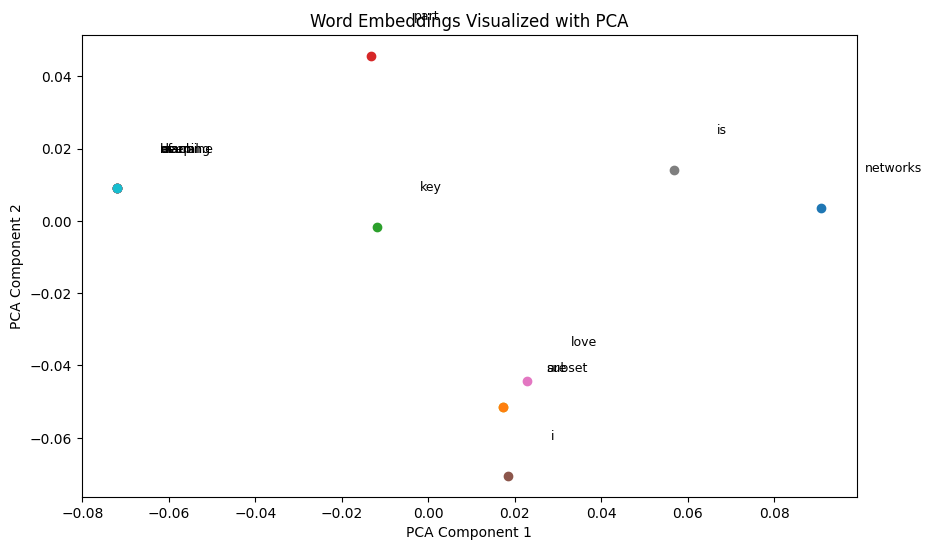

In [69]:

# Reshape the embeddings to a 2D array (num_words, embedding_dim)
embeddings_reshaped = embeddings.reshape(-1, embedding_dim)

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_reshaped)

# Plot the embeddings
plt.figure(figsize=(10, 6))
for i, word in enumerate(tokenizer.word_index.keys()):
    if i < embeddings_2d.shape[0]:
        plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
        plt.text(embeddings_2d[i, 0] + 0.01, embeddings_2d[i, 1] + 0.01, word, fontsize=9)
plt.title("Word Embeddings Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()